### Imports

In [ ]:
# Configuring the model for training
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics='accuracy')

history = model.fit(
    train,
    epochs=10,
    validation_data=val
)

In [56]:
# Simple CNN
# LeNet
# Activation: tanh
# Conv (kernel = 5x5, strides = 1) --> avg pool (kernel = 2x2, strides = 2) --> Conv(5x5, strides = 1) --> avg pool(2x2, strides = 2) --> Flatten --> Dense --> Sigmotrain, test, val = load_data()id
data_dir = '/Users/gustavchristensen/Documents/SDU/MSc. Data Science/3. Semester - DT/Anvendt Maskinlæring'
BATCH_SIZE = 32
train, test, val = load_data(data_dir, perc=1, batch_size=BATCH_SIZE)


In [71]:
# ----- Tensorflow -----
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import regularizers as reg
from keras import optimizers optt
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

from keras.layers import Input, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate, AveragePooling2D

# ----- Utility functions -----
from utils import load_data, plot_hist

## Alternative Architectures
- Consider and discuss alternative CNN model architectures

#### LeNet

In [59]:
# LeNet
inputs = Input(shape=(96,96,3))
x = Conv2D(filters=6, kernel_size=5, activation='relu')(inputs)
x = AveragePooling2D(pool_size=2)(x)
x = Conv2D(filters=16, kernel_size=5, activation='relu')(x)
x = AveragePooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(7056, activation='sigmoid')(x)
x = Dense(120, activation='sigmoid')(x)
x = Dense(1, activation='sigmoid')(x)
outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 92, 92, 6)         456       
                                                                 
 average_pooling2d_20 (Avera  (None, 46, 46, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_23 (Conv2D)          (None, 42, 42, 16)        2416      
                                                                 
 average_pooling2d_21 (Avera  (None, 21, 21, 16)       0         
 gePooling2D)                                                    
                                                                 
 flatten_10 (Flatten)        (None, 7056)              0  

#### ResNet

In [79]:
inputs = Input(shape=(96,96,3))
x = Conv2D(filters=48, kernel_size=11, activation='relu')(inputs)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
#x = MaxPooling2D((3, 3), strides=(2,2) )(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
#x = AveragePooling2D(pool_size=2)(x)
#x = Conv2D(filters=6, kernel_size=3, activation='relu')(x)
#x = AveragePooling2D(pool_size=2)(x)

model.compile(optimizer=opt.Nadam(learning_rate=0.0002),
	loss='categorical_crossentropy',
	metrics=['accuracy'])

model.summary()

history = model.fit(train, epochs = 10, validation_data= val)


Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 86, 86, 48)        17472     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 28, 28, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 24, 24, 128)       153728    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 6, 6, 192)         221

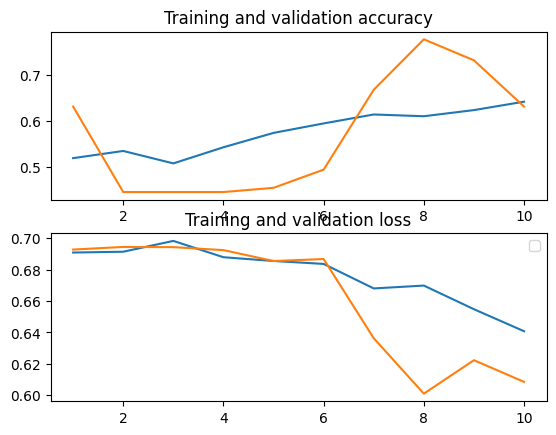

In [80]:
plot_hist(history)

In [75]:
# small convnet from DLPR
inputs = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
outputs = Dense(2, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)



## Alternative Optimizers
- Visualize impact on training/validation losses and accuracies

In [ ]:
# ----- SGD -----
opt1 = tf.keras.optimizers.SGD(learning_rate=0.001)

# ----- RMSProp -----
opt2 = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# ----- Adagrad -----
opt3 = tf.keras.optimizers.Adagrad(learning_rate=0.001)

# ----- Adam -----
opt4 = tf.keras.optimizers.Adam(learning_rate=0.001)


## Data Augmentation
- Visualize impact on training/validation losses and accuracies
- Discuss data augmentation and its relation to overfitting